## Who Survived the Titanic?

In [2]:
import pandas as pd 
tdf = pd.read_csv('data/titanic.csv', sep = ',', header=0)

# Helpful tools to learn about yoru data
print(tdf.info())          # gives the structure of the data (rows/cols)
print(tdf.head())          # shows the top five data entries
print(tdf.describe())      # gives the statistics on the data in the DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

### Set up the data for the decision tree analysis

In [3]:
# Only keep the features we want to use and place the "target" at the end
tdf = tdf[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# Change sex to numeric value so we can use DecisionTreeClassifier() <-- string okay for target, but not as an input
tdf['Sex'] = tdf['Sex'].map({'male': 0, 'female': 1})

# Drop rows with missing fields
tdf = tdf.dropna() 
#print(df.info())
columns = list(tdf)

### Separate the independent variables (AKA Features) from the dependent labels (AKA Target)

In [4]:
X = tdf.iloc[:, 0:6]   # load features into X DF
Y = tdf.iloc[:, 6]     # Load target into Y DF

### Split the Training and Testing Data

In [5]:
# Ensure that the decision tree is deterministic
import numpy as np
np.random.seed(101)

In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

### Generate and evaluate the model

In [7]:
from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=4).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

# NOTE: You should, when testing models, only vary 1 thing at a time. 

In [8]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 77.77777777777779%
Gini accuracy is : 83.33333333333334%


## Visualize the results

In [9]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

,Predicted Died,Predicted Survived
True Died,43,5
True Survived,7,17


In [10]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = columns[0:6])
dotfile.close()

# Convert the dot file to a png
#import os
#os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
from subprocess import check_call
check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

0

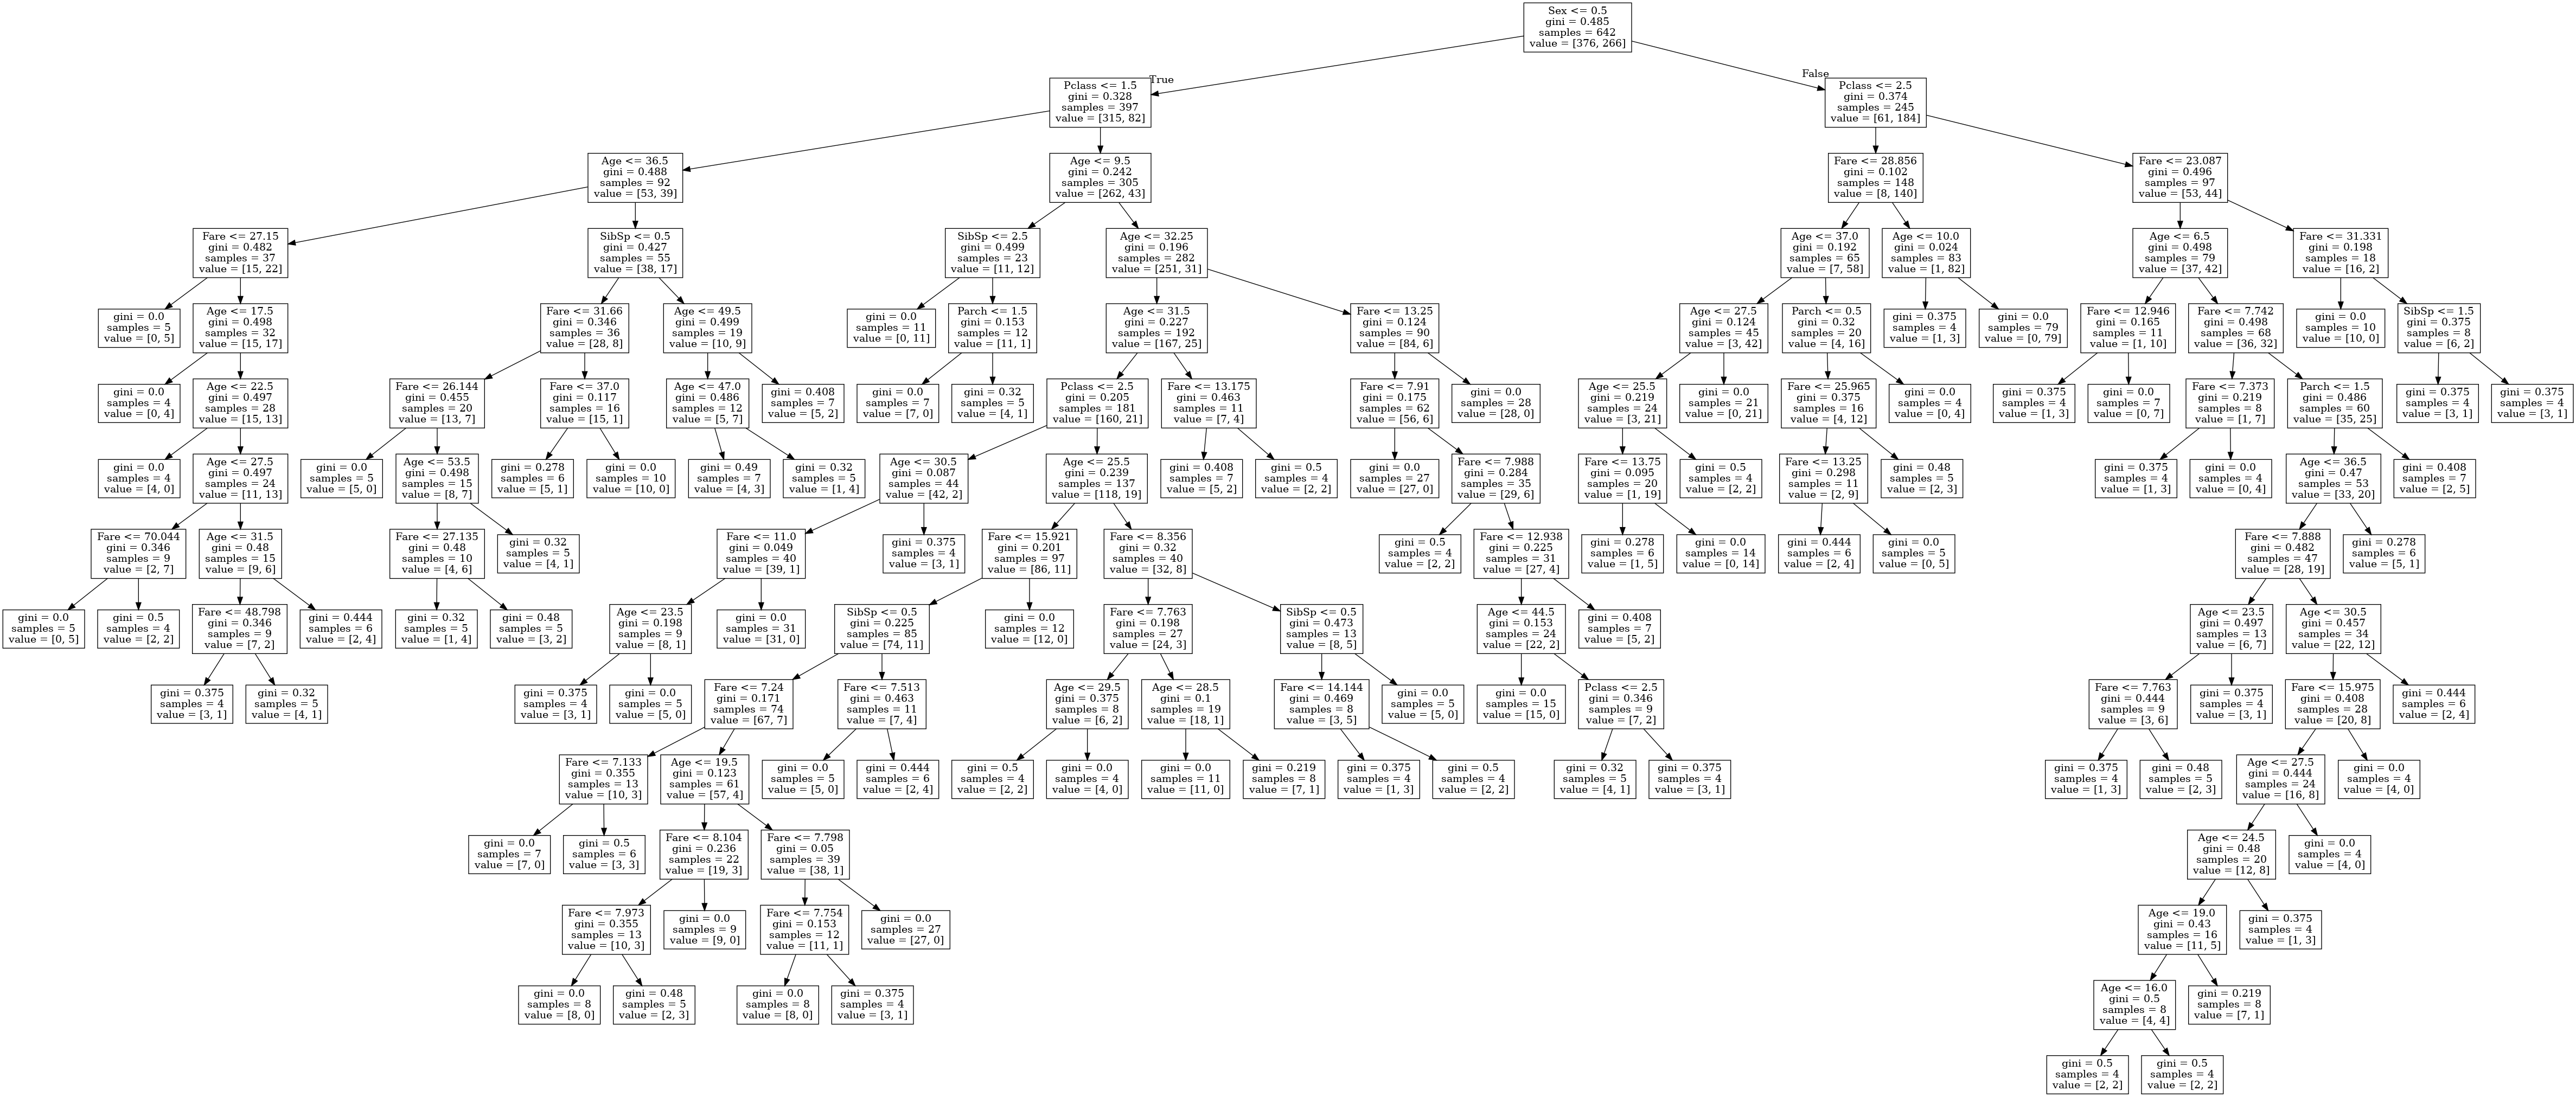

In [11]:
# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 